In [2]:
from functions import *

In [4]:
tickers = getTickers()
end = dt.now()
start = dt.fromisoformat('2015-01-01')

In [5]:
data = getData(start, end, tickers[0:3], True) 

Data was loaded sucessfully!


In [7]:
indicies_to_remove = data.isna().sum().sort_values(ascending=False).head(40).index

In [8]:
data.drop(indicies_to_remove, axis = 1, inplace = True)

In [9]:
m = getCorrMatrix(data)

In [14]:
eVal0, eVec0, eVal1, eVec1, corr1, var0 = denoiseMatrix(m, 2)

/Users/dario/Desktop/Projects/thesis/algorithm/functions.py:54: RuntimeWarning: divide by zero encountered in divide
  pdf=q/(2*np.pi*var*eVal)*((eMax-eVal)*(eVal-eMin))**.5
/Users/dario/Desktop/Projects/thesis/algorithm/functions.py:54: RuntimeWarning: invalid value encountered in multiply
  pdf=q/(2*np.pi*var*eVal)*((eMax-eVal)*(eVal-eMin))**.5
/Users/dario/Desktop/Projects/thesis/algorithm/functions.py:54: RuntimeWarning: divide by zero encountered in divide
  pdf=q/(2*np.pi*var*eVal)*((eMax-eVal)*(eVal-eMin))**.5
/Users/dario/Desktop/Projects/thesis/algorithm/functions.py:54: RuntimeWarning: invalid value encountered in multiply
  pdf=q/(2*np.pi*var*eVal)*((eMax-eVal)*(eVal-eMin))**.5
/Users/dario/Desktop/Projects/thesis/algorithm/functions.py:54: RuntimeWarning: divide by zero encountered in divide
  pdf=q/(2*np.pi*var*eVal)*((eMax-eVal)*(eVal-eMin))**.5
/Users/dario/Desktop/Projects/thesis/algorithm/functions.py:54: RuntimeWarning: invalid value encountered in multiply
  pdf=q/(2

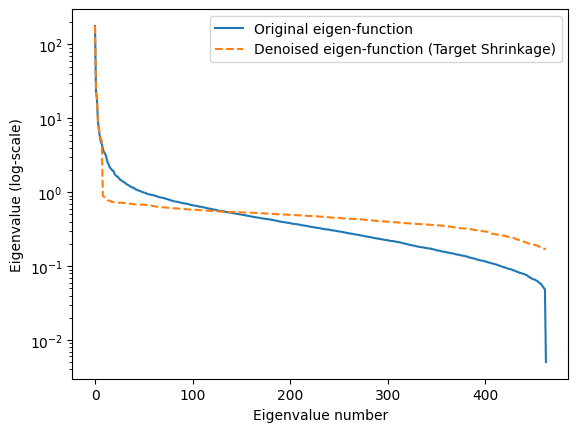

In [15]:
plotEvalDiff(eVal0, eVal1, 2)